# Part I - Ford GoBike System Data Exploration
## by Samuel Ayer

## Introduction
> The dataset contains information on trips taken using a bike-share system in the greater San Francisco Bay area. It contains information on trips like the duration, the gender and birth years of the riders and the latitudes and longitudes of the start and end stations.

## Table of contents
<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univar">Univariate Exploration</a></li>
<li><a href="#bivar">Bivariate Exploration</a></li>
<li><a href="#multivar">Multivariate Exploration</a></li>
</ul>

<a id='wrangling'></a>
## Preliminary Wrangling

In [23]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [24]:
# loading dataset into pandas
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [25]:
# shape of the dataframe
df.shape

(183412, 16)

In [26]:
# overview of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

The datatype of the `start_time` and `end_time` columns should be datetime not string

`member_birth_year` column should be int not float

Even though the `start_station_id`, `end_station_id` and `bike_id` columns contain numbers, they are better stored as strings as they do not have any numeric value

It appears the data also contains some nulls. I will investigate this further

In [27]:
#checking for nulls
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The dataset is missing a few information on the names and ids of the start and end station of some trips.

The dataset is also missing the gender and birth year information of some of the riders

I will check for duplicates.

In [28]:
# checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the data

### Issues
* wrong datatypes
* missing data

I want to keep the original data as it is therefore I will copy the data into another dataframe and perform data cleaning actions on it.

In [29]:
# copying data
import copy
ford = copy.deepcopy(df)

### Issue:
* missing data

### Define:
* drop all rows containing nulls

### Code

In [30]:
# dropping nulls
ford.dropna(inplace=True)

### Test

In [31]:
ford.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

There are no more nulls in the dataframe

### Issue:
* wrong datatypes

### Define
* convert wrong datatypes to appropriate datatypes

### Code

In [32]:
# converting start time column to datetime
ford['start_time'] = pd.to_datetime(ford['start_time'])
# converting end time column to datetime
ford['end_time'] = pd.to_datetime(ford['end_time'])
# converting birth year column to integer
ford['member_birth_year'] = ford['member_birth_year'].astype(int)
# converting columns to string
columns = ['start_station_id','end_station_id','bike_id']
for i in columns:
    ford[i] = ford[i].astype(str)

### Test

In [33]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> 174952 rows with 16 columns

### What is/are the main feature(s) of interest in your dataset?

> My interest lies in duration of trips and how other variables relate to and impact it

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect a variation in duration based on gender, birth year and user type.

<a id='univar'></a>
## Univariate Exploration

##### Duration

what is the distribution of duration?

In [34]:
# checking value counts of duration
ford['duration_sec'].value_counts()

272     308
323     285
305     282
369     280
306     276
       ... 
4080      1
2827      1
8199      1
3993      1
2822      1
Name: duration_sec, Length: 4429, dtype: int64

Value counts offer little to no information on the distribution therefore I will plot the distribution on a histogram.

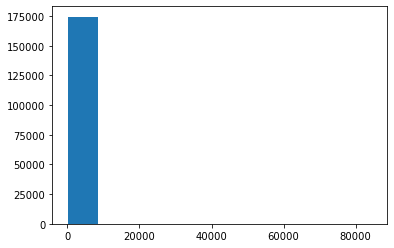

In [35]:
# plotting histogram on distribution of duration
plt.hist(data=ford,x='duration_sec');

Only one bar is plotted because there are outliers in the dataset. I will investigate and eliminate these outliers from the data.

To calculate for outliers, I will need the first and third quartiles which are the 25th and 75th percentiles respectively.

In [36]:
# summary statistics on the duration column
ford['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

The first quartile is 323 and the third quartile is 789.

I will use the interquartile range formula to calculate for outliers. With this formula, the first quartile is subtracted from the third quartile. A high outlier will then be any number equal to or greater than 1.5 times the interquartile range plus the third quartile.

I will import some libraries for this

In [37]:
# importing necessary libraries
from numpy import cos, sin, arcsin, sqrt
from math import radians
# calculating quartiles and outliers
# first quartile
q1 = ford['duration_sec'].describe()[4]
print('first quartile: ' + str(q1))
# third quartile
q3 = ford['duration_sec'].describe()[6]
print('third quartile: '+ str(q3))
# interquartile range
iqr = q3-q1
print('interquartilerange: '+str(iqr))
# high outliers
high_out = q3+(1.5*iqr)
print('higher outlier: '+str(high_out))
# low outliers
low_out = q1-(1.5*iqr)
print('lower outlier: '+str(low_out))

first quartile: 323.0
third quartile: 789.0
interquartilerange: 466.0
higher outlier: 1488.0
lower outlier: -376.0


Any number equal to or greater than 1488 is considered an outlier. Same goes for any number equal to or lesser than -376 but there are no negatives in the duration column therefore I will only focus on the high outliers.

In [38]:
# checking for number of observations considered outliers
ford.query('duration_sec >= 1488').count()[0]

9346

9346 rows fall within the outlier range therefore I will drop them.

In [39]:
# dropping outlier rows using index
ford.drop(ford.query('duration_sec >= 1488').index,inplace=True)
# confirming
ford.query('duration_sec >= 1488')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


All rows in that range have been dropped. Now I will replot the distribution on a histogram.

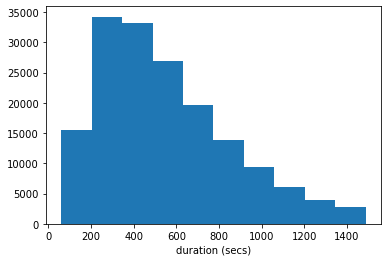

In [40]:
plt.hist(data=ford,x='duration_sec')
plt.xlabel('duration (secs)');

The data looks skewed to the right therefore I will use log transform to change the scale

In [41]:
# summary statistics of the column in log 10
np.log10(ford['duration_sec'].describe())

count    5.219076
mean     2.740445
std      2.483084
min      1.785330
25%      2.496930
50%      2.688420
75%      2.863917
max      3.172311
Name: duration_sec, dtype: float64

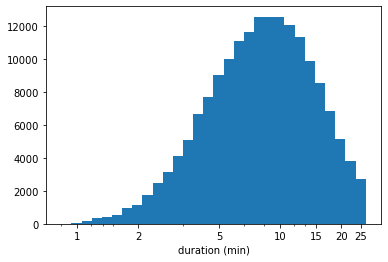

In [42]:
# generating bins
bins = 10**np.arange(1.7,3.2+0.05,0.05)
# plotting distribution
plt.hist(data=df,x='duration_sec',bins=bins)
plt.xscale('log')
# giving tick labels on x axis
plt.xticks([60,120,300,600,900,1200,1500],[1,2,5,10,15,20,25])
plt.xlabel('duration (min)');

The data now looks more normally distributed than the previous visual.

Majority of the rides fall between 5 to 15 mins with a peak of around 9 mins.

I will calculate the mean duration.

In [43]:
ford['duration_sec'].describe()

count    165606.000000
mean        550.103909
std         304.147101
min          61.000000
25%         314.000000
50%         488.000000
75%         731.000000
max        1487.000000
Name: duration_sec, dtype: float64

from the descriptive statistics the mean duration in seconds is 550.1. I will convert this to minutes to get a better understanding

In [44]:
mean_min = ford['duration_sec'].describe()[1]/60
print('mean duration in minutes: '+str(mean_min))

mean duration in minutes: 9.16839848797749


The mean duration in mintues is 9.2 minutes.

##### Gender

what is the gender distribution of the riders?

In [45]:
# value counts of gender column
ford['member_gender'].value_counts()

Male      124124
Female     38168
Other       3314
Name: member_gender, dtype: int64

Gender is divided into male, female and 'other' for other genders.

I will plot the value counts in a bar plot to get a better look.

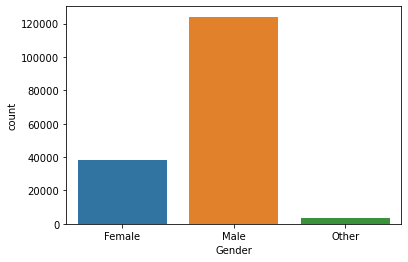

In [46]:
sb.countplot(data=ford,x='member_gender')
plt.xlabel('Gender');

The number of male riders is about three times the number of female riders which is also about 10 times the number of members of other genders.

##### start time

what is the distribution of trips for year, month, day of the week and hour of day?

In [47]:
# checking date of first trip
min(ford['start_time'])

Timestamp('2019-02-01 00:00:20.636000')

The earliest ride in the data is 1st February,2019

In [48]:
# checking date of last trip
max(ford['start_time'])

Timestamp('2019-02-28 23:59:18.548000')

The latest ride in the data was on 28 February,2019.

As the data only includes one month and year, I will use the day of the week and hour of day.

In [49]:
# creating new column to contain day names
ford['dow'] = ford['start_time'].dt.day_name()
# showing value counts
ford['dow'].value_counts()

Thursday     32251
Tuesday      29387
Wednesday    27323
Friday       26356
Monday       24376
Saturday     12964
Sunday       12949
Name: dow, dtype: int64

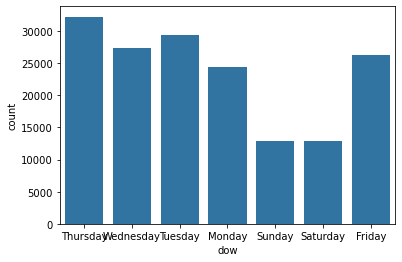

In [50]:
#setting color
base_color = sb.color_palette()[0]
#plotting value counts on a bar plot
sb.countplot(data=ford,x='dow',color=base_color);

I will order the day names and plot the visual again to get a better look

In [51]:
# order of day names
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
dow_ordered = pd.api.types.CategoricalDtype(ordered=True, categories= day_of_week)
# assigning ordered category to column
ford['dow'] = ford['dow'].astype(dow_ordered)

I will plot the visual again

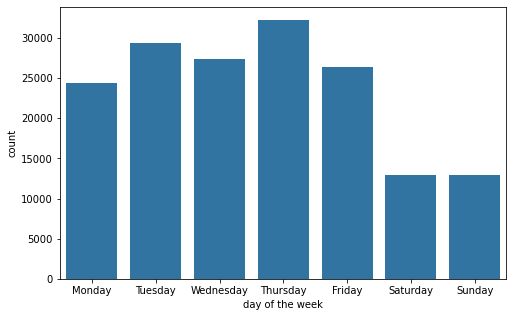

In [52]:
plt.figure(figsize=(8,5))
sb.countplot(data=ford,x='dow',color = base_color)
plt.xlabel('day of the week');

From the plot, we can tell that the most trips were on Thursdays and the least trips were on Saturdays and Sundays.

I will now investigate the distribution of trips for each hour of day.

In [53]:
# creating column to contain hour of day trips started
ford['hour_of_day'] = ford['start_time'].dt.hour
ford['hour_of_day'].unique()

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1,  0], dtype=int64)

I will now plot the distribution

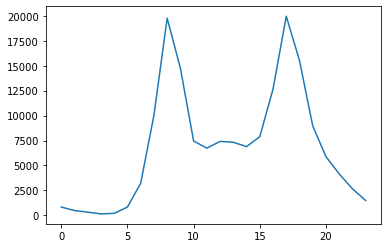

In [54]:
x = ford['hour_of_day'].unique()
y = ford['hour_of_day'].value_counts(sort=False)
plt.plot(x,y);

It appears there are two peaks in the distribution. I will expand the ticks on the x-axis so i can correctly identify the peak times.

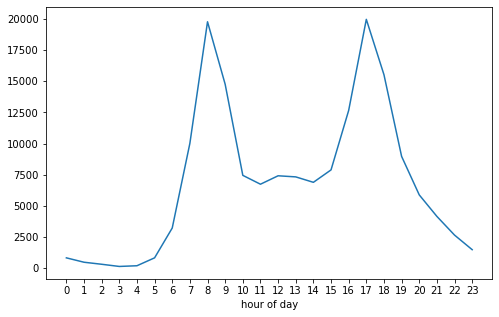

In [55]:
# since the ticks and labels are the same one variable will be used
plt.figure(figsize=(8,5))
plt.plot(x,y)
ticks = np.arange(0,24,1)
plt.xticks(ticks)
plt.xlabel('hour of day');

There is one peak in the moring and another peak in the late afternoon to evening.

The morning peak is between 7 and 9 hours.

The evening peak is between 16 and 18 hours.

##### Age

The trips were in February 2019 therefore I will calculate the ages of the riders by subtracting their birthyear from 2019

In [56]:
# creating age column
ford['age'] = 2019 - ford['member_birth_year']
# value counts of ages
ford['age'].value_counts()

31     9697
26     8840
30     8468
29     8317
28     8040
       ... 
141       1
89        1
109       1
75        1
92        1
Name: age, Length: 75, dtype: int64

The modal age is 31.

It appears there are some ages in the hundreds and even though this maybe a validity issue, I will only remove them if they affect the distribution.

In [57]:
# calculating age of youngest member
young = min(ford['age'])
print('youngest member\'s age: ' + str(young))
# calculating age of oldest member
old = max(ford['age'])
print('oldest member\'s age: ' + str(old))
# calculating mean age
mean = ford['age'].describe()[1]
print('mean age: ' + str(mean))

youngest member's age: 18
oldest member's age: 141
mean age: 34.16522952066954


I will plot the distribution of ages on a histogram.

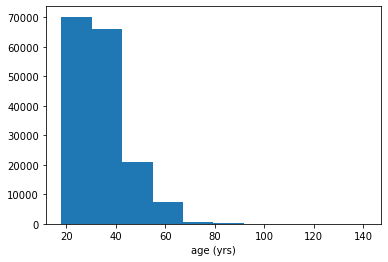

In [58]:
plt.hist(data=ford,x='age')
plt.xlabel('age (yrs)');

The data is skewed to the right so i will use appropriate bins to better visualize the data.

Also majority of the distribution falls between 18 and 80 therefore I will remove ages above 80 from the dataset.

In [59]:
# number of members above 80 years
num = ford.query('age> 80').count()[0]
print('number of members above 80yrs: ' + str(num))
# dropping usiing index
ford.drop(ford.query('age > 80').index,inplace=True)
# confirming
ford.query('age > 80')

number of members above 80yrs: 187


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour_of_day,age


all rows with ages above 80 have been dropped

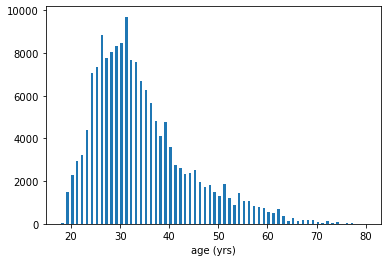

In [60]:
# generating bins
bins = np.arange(18,ford['age'].max()+0.5,0.5)
# plottimg hsitogram
plt.hist(data=ford,x='age',bins=bins)
# labelling x axis
plt.xlabel('age (yrs)');

Majority of the age fall between 20 and 40 with a peak around 31-32 years.

##### Distance

I will calculate the distance between the start stations and end stations using the latitudes and longitudes.

In [61]:
# creating function to calculate distance in kilometres
def haversine(row):
    lon1 = row['start_station_longitude']
    lat1 = row['start_station_latitude']
    lon2 = row['end_station_longitude']
    lat2 = row['end_station_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km
# applying function to dataframe to create new column
ford['distance'] = ford.apply(lambda row: haversine(row), axis=1)

In [62]:
ford['distance'].nunique

<bound method IndexOpsMixin.nunique of 6         2.027278
9         3.661801
10        0.979209
11        1.612434
12        4.777212
            ...   
183407    1.463847
183408    1.401835
183409    0.378828
183410    0.746813
183411    0.709949
Name: distance, Length: 165419, dtype: float64>

The values have 6 decimal points. I will limit this to just two decimal points.

In [63]:
# rounding to two decimal places
ford['distance'] = ford['distance'].round(2)

I will now plot the distribution of distance on a histogram

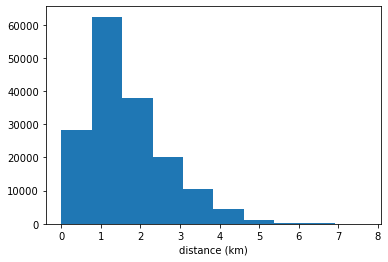

In [64]:
plt.hist(data=ford,x='distance')
plt.xlabel('distance (km)');

The distribution is rightly skewed.

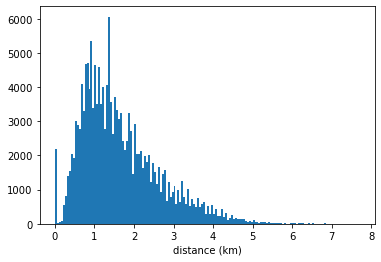

In [65]:
bins = np.arange(0,ford['distance'].max()+0.05,0.05)
plt.hist(data=ford,x='distance',bins=bins)
plt.xlabel('distance (km)');

Majority of the distance covered fall between 0 and 2 km with a peak around 1.5km.

In [66]:
ford['distance'].mean()

1.6483258875945188

The mean distance is 1.65km

##### user type

what is the distribution of customers and subcribers?

In [67]:
# value counts of user types
ford['user_type'].value_counts()

Subscriber    151749
Customer       13670
Name: user_type, dtype: int64

I will plot this on a bar plot.

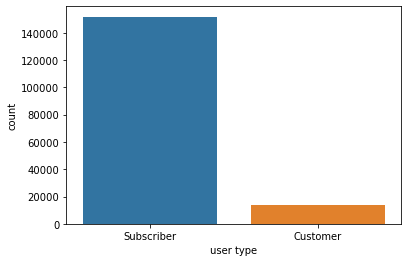

In [68]:
sb.countplot(data=ford,x='user_type')
plt.xlabel('user type');

The number of subscribers is about 10 times the number of customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration column had outliers so i dropped rows containing the outliers

> The duration was rightly skewed so i performed log transformations to make the distribution appear more normally distributed.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created new columns to contain the day of the week  and hour of day from the `start_time` columns

> I created another column to contain the distance between the start and end stations using the longitudes and latitudes of both stations.

<a id='bivar'></a>
## Bivariate Exploration

I will look at correlations between the numeric columns of interest

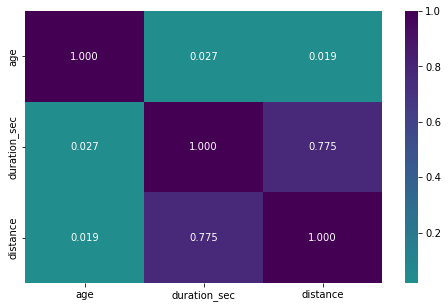

In [69]:
# numeric variables
num_vars = ['age','duration_sec','distance']
plt.figure(figsize = [8, 5])
# plotting heatmap using correlations
sb.heatmap(ford[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.show()

The relationships between the numeric columns are positive however, the relationships between age and distance and age and duration are very weak relationships.

The relationship between duration and distance is strong.

I will visualize the relationship between age and distance and duration in a scatter plot.

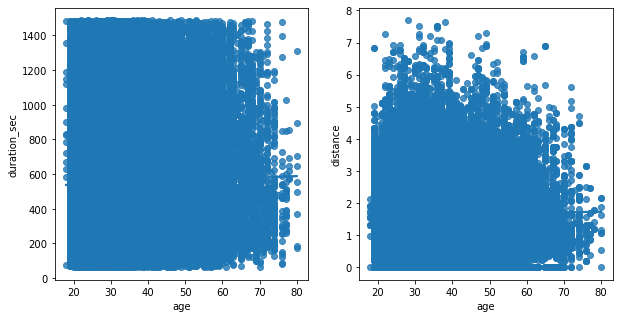

In [70]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sb.regplot(data=ford,x='age',y='duration_sec')

plt.subplot(1,2,2)
sb.regplot(data=ford,x='age',y='distance');

Because of the large number of observations, the visual is overplotted therefore I will create a subset of 2000 random observations from the data

In [71]:
# creating subset
ford_subset = ford.sample(n=2000)
ford_subset.shape

(2000, 20)

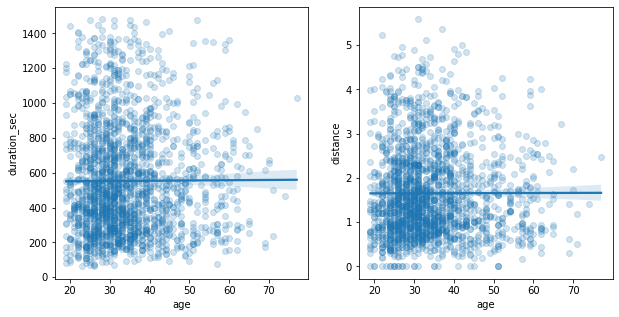

In [72]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sb.regplot(data=ford_subset,x='age',y='duration_sec',scatter_kws={'alpha': 1/5})

plt.subplot(1,2,2)
sb.regplot(data=ford_subset,x='age',y='distance',scatter_kws={'alpha': 1/5});

There are appears to be a positive relationship but as indicated by the correlation, the relationship is very weak.

I will now plot the relationship between duration and distance.

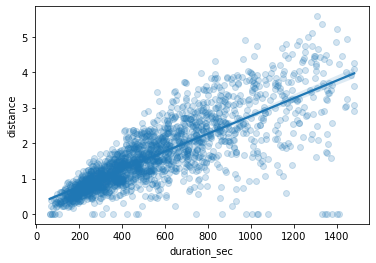

In [73]:
sb.regplot(data=ford_subset,x='duration_sec',y='distance',scatter_kws={'alpha':1/5});

The scatter plot shows the positive relationship between distance and duration.

I will now compare the categorical variables using the numeric variables

##### gender and duration

I want to look at average duration for each gender.

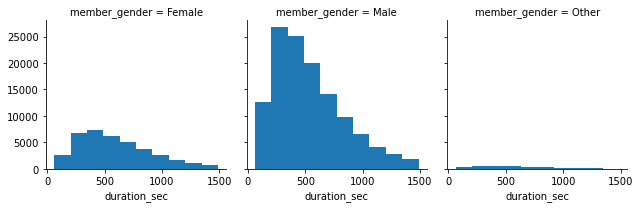

In [74]:
g=sb.FacetGrid(data=ford,col='member_gender')
g.map(plt.hist,'duration_sec');

For each gender, the distribution is rightly skewed. 

The peak for each gender seems to be around 500-600 seconds.

I will plot the average duration on a bar plot to better visualize the difference.

In [75]:
# calculating mean duration and grouping by gender
gen_dur = ford.groupby('member_gender',as_index=False)['duration_sec'].mean()
gen_dur

,member_gender,duration_sec
0,Female,594.229874
1,Male,536.175730
2,Other,572.362428


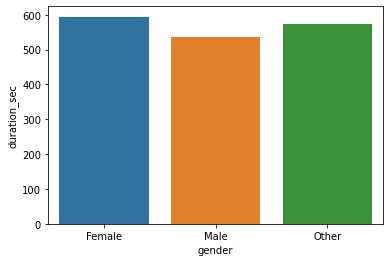

In [76]:
# plotting mean durations
sb.barplot(data=gen_dur,x='member_gender',y='duration_sec')
plt.xlabel('gender');

From the bar plot, we can tell that females have a higher average duration compared to the other genders. Males have the least average duration

##### gender and distance

which gender covers more distance on the average?

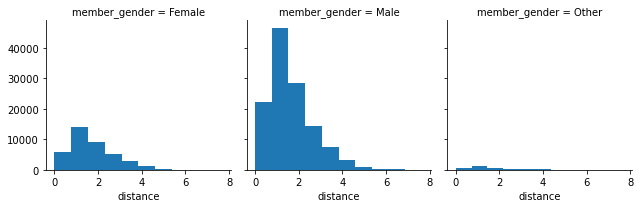

In [77]:
g=sb.FacetGrid(data=ford,col='member_gender')
g.map(plt.hist,'distance');

For each gender, majority of the distribution falls between 0 and 2km with a peak around 1.5. I will investigate this further.

In [78]:
gen_dist = ford.groupby('member_gender',as_index=False)['distance'].mean()
gen_dist

,member_gender,distance
0,Female,1.712575
1,Male,1.625850
2,Other,1.749924


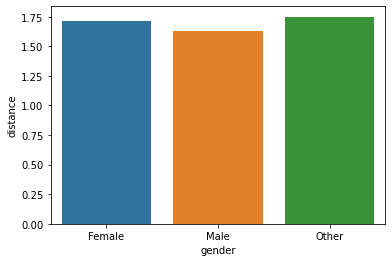

In [79]:
sb.barplot(data=gen_dist,x='member_gender',y='distance')
plt.xlabel('gender');

On the average, members of `other` gender covered more distance than their male and female counterparts.

However, females covered more distance than their male counterparts

##### Gender and Age

what is the distribution of age for each gender?

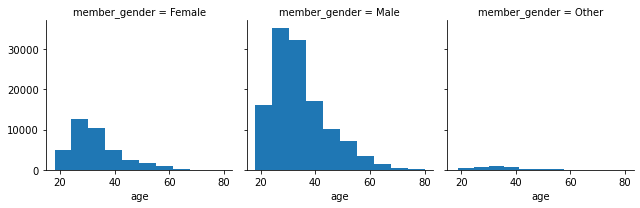

In [80]:
g=sb.FacetGrid(data=ford,col='member_gender')
g.map(plt.hist,'age');

For each gender, most of the ages are between 20 and 40 with a peak around 34-35 years

In [81]:
gen_age = ford.groupby('member_gender',as_index=False)['age'].mean()
gen_age

,member_gender,age
0,Female,33.174411
1,Male,34.333973
2,Other,35.603443


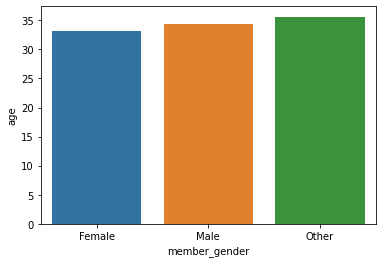

In [82]:
sb.barplot(data=gen_age,x='member_gender',y='age');

On the average, members whose gender were classified as 'other' are older than male and female members.

Males have a higher average age than females.

##### Gender and user type

Thursdays have the highest trips but i want to investigate if it is the same for individual genders.

C:\Users\ayers\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


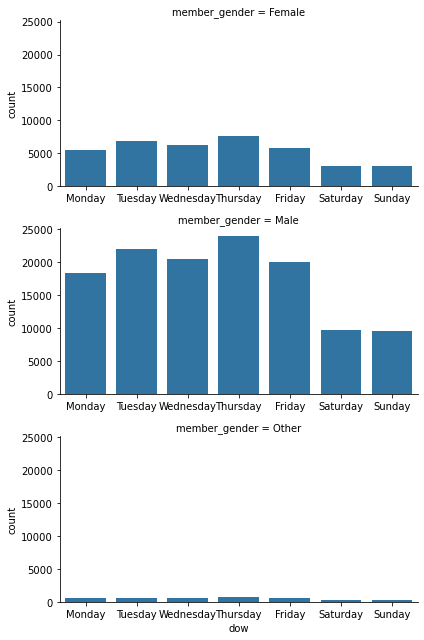

In [83]:
g=sb.FacetGrid(data=ford,col='member_gender',sharex=False,aspect=2,col_wrap=1)
g.map(sb.countplot,'dow');

It appears Thurday is the peak day for trips for all genders.

##### Gender and user type

There are more Subscribers than Customers in the data but is it different for any gender?

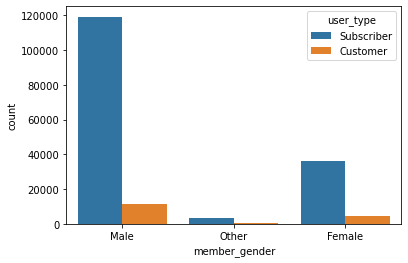

In [84]:
sb.countplot(data=df,x='member_gender',hue='user_type',hue_order=['Subscriber','Customer']);

For each gender, there are more subscribers than customers.

##### user type and duration

Is average duration affected by user type?

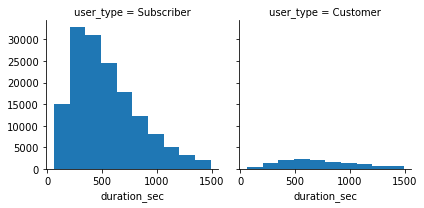

In [85]:
g=sb.FacetGrid(data=ford,col='user_type')
g.map(plt.hist,'duration_sec');

I will plot the average durations to visualize the difference.

In [86]:
# calculating mean duration and grouping by user type
user_dur = ford.groupby('user_type',as_index=False)['duration_sec'].mean()
user_dur

,user_type,duration_sec
0,Customer,716.638552
1,Subscriber,535.297465


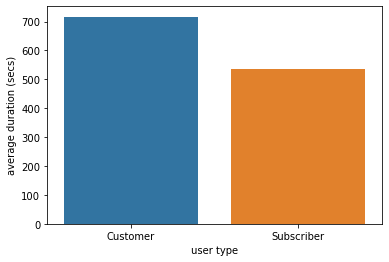

In [87]:
# plotting means on bar plot
sb.barplot(data=user_dur,x='user_type',y='duration_sec')
plt.xlabel('user type')
plt.ylabel('average duration (secs)');

Customers have a higher average duration as compared to subscribers.

The mean duration for all members is 550 seconds therefore customers have a higher average duration than the overall average while subcribers have a lower average duration than the overall average.

##### user type and distance

In [88]:
# calculating mean distance and grouping by user type
user_dis = ford.groupby('user_type',as_index=False)['distance'].mean()
user_dis

,user_type,distance
0,Customer,1.871346
1,Subscriber,1.628236


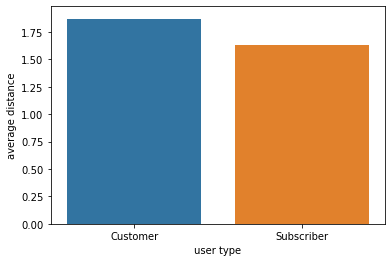

In [89]:
sb.barplot(data=ford,x='user_type',y='distance',order=['Customer','Subscriber'],errwidth=0)
plt.xlabel('user type')
plt.ylabel('average distance');

On the average, customers covered more distance than subscribers.

##### user type and age

In [90]:
# calculating mean age and grouping by user type
user_age = ford.groupby('user_type',as_index=False)['age'].mean()
user_age

,user_type,age
0,Customer,33.734674
1,Subscriber,34.124264


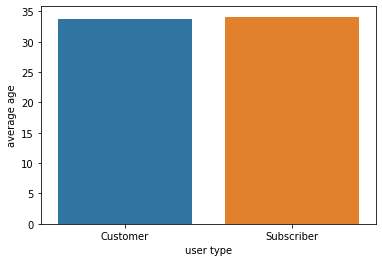

In [64]:
sb.barplot(data=user_age,x='user_type',y='age')
plt.xlabel('user type')
plt.ylabel('average age');

Even though Subscribers have a higher average age, the difference is not much.

I will check which day of the week has the highest average duration

##### User type and day of the week

Is the peak day of trips the same for both user types?

C:\Users\ayers\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


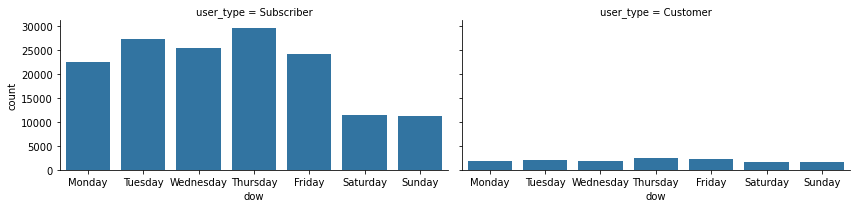

In [91]:
g=sb.FacetGrid(data=ford,col='user_type',sharex=False,aspect=2)
g.map(sb.countplot,'dow');

The peak for both customers and subscribers remains Thursday.

##### day of the week and duration

In [92]:
# calculating mean duration and grouping by day of the week
dow_dur = ford.groupby('dow',as_index=False)['duration_sec'].mean()
dow_dur

,dow,duration_sec
0,Monday,543.778901
1,Tuesday,545.509705
2,Wednesday,545.878215
3,Thursday,554.820943
4,Friday,552.599369
5,Saturday,561.805401
6,Sunday,555.085931


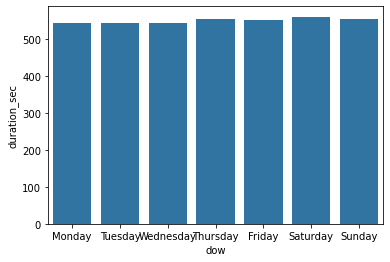

In [93]:
sb.barplot(data=dow_dur,x='dow',y='duration_sec',color=base_color);

Saturdays have the highest average duration.

##### day of the week and hour of day

My assumption is that the peak times are around 7-9am and 4-6pm because those are the times people go to work and close respectively. I expect that the peak times will be different on weekends. Therefore rather than plot the distribution for each day, I will plot for weekdays and weekends.

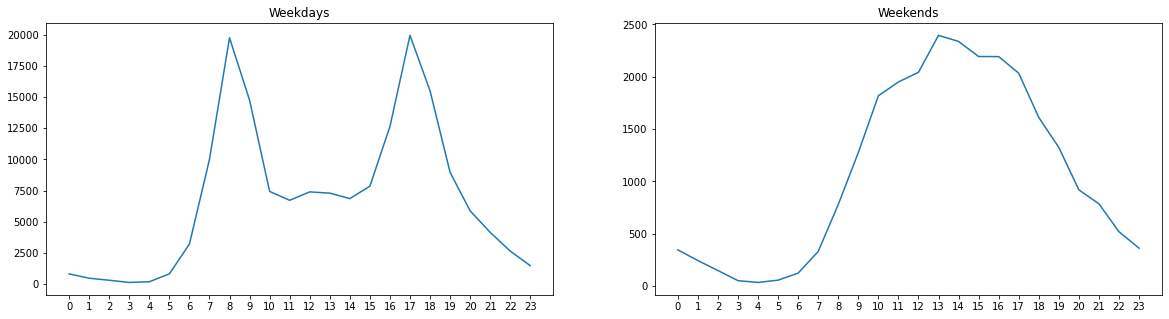

In [94]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
x = ford.query('dow != "Saturday" | dow != "Sunday"')['hour_of_day'].unique()
y = ford.query('dow != "Saturday" | dow != "Sunday"')['hour_of_day'].value_counts(sort=False)
plt.plot(x,y)
plt.title('Weekdays')
plt.xticks(ticks_and_labels,ticks_and_labels)

plt.subplot(1,2,2)
x = ford.query('dow == "Saturday" | dow == "Sunday"')['hour_of_day'].unique()
y = ford.query('dow == "Saturday" | dow == "Sunday"')['hour_of_day'].value_counts(sort=False)
plt.plot(x,y)
plt.title('Weekends')
plt.xticks(ticks_and_labels,ticks_and_labels);

While the peak hours of week days is in line with the overall peak hours, weekends have a single peak period which is different from the overall peak periods.

During weekends, the peak is around 13:00 to 16:00

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Strong positive relationship between distance and duration

> Weak positive relationship between age and duration and age and distance

> Customers have a higher average duration and distance than Subscribers

> Females have a higher average duration than males and other genders

> Saturdays have the highest average duration



<a id='multivar'></a>
## Multivariate Exploration


I will breakdown the correlation between the numeric variables into gender

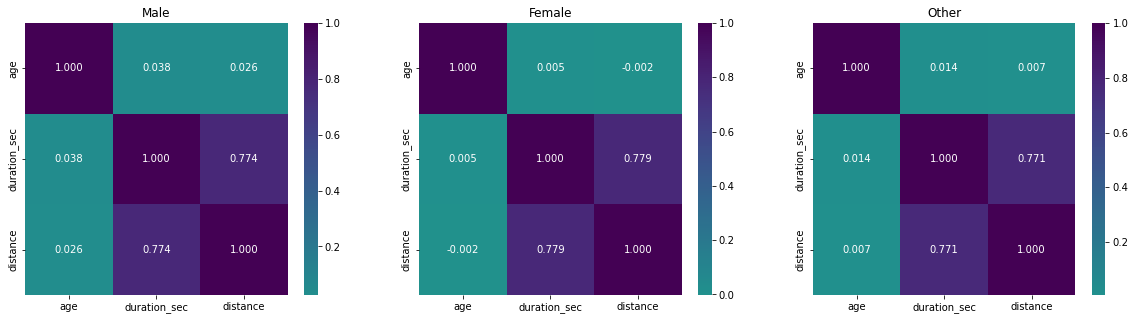

In [95]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
# subset of male members
males = ford.query('member_gender=="Male"')
# correlation heatmap
sb.heatmap(males[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Male')

plt.subplot(1,3,2)
# subset of female members
females = ford.query('member_gender=="Female"')
# correlation heatmap
sb.heatmap(females[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Female')

plt.subplot(1,3,3)
# subset of other members
other = ford.query('member_gender=="Other"')
# correlation heatmap
sb.heatmap(other[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Other');

The correlations are not much different from that of the overall correlation.

However, I noticed that for females, age had a negative relationship with distance even though it is very weak.

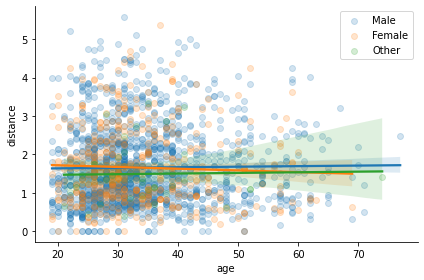

In [96]:
g = sb.FacetGrid(data=ford_subset,hue='member_gender',hue_order=['Male','Female','Other'],height=4,aspect=1.5)
g.map(sb.regplot,'age','distance',scatter_kws={'alpha': 1/5})
plt.legend();

While the male and other lines seem to be rising, the line of females seems to be sloping downward

I will break down the correlations into user types.

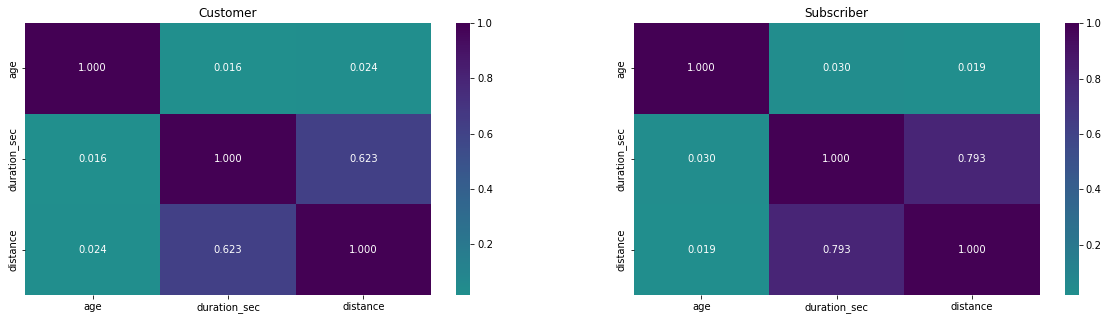

In [97]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
cus_ford = ford.query('user_type=="Customer"')
sb.heatmap(cus_ford[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Customer')

plt.subplot(1,2,2)
sub_ford = ford.query('user_type=="Subscriber"')
sb.heatmap(sub_ford[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Subscriber');

The relationship between age and duration and age and distance is weak for both user types.

However, the correlation between duration and distance is higher for subscribers.

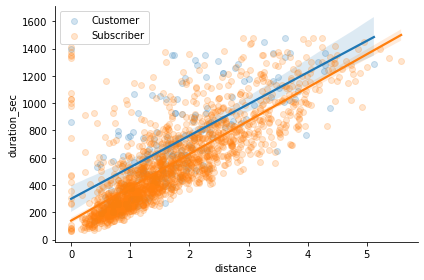

In [98]:
g = sb.FacetGrid(data=ford_subset,hue='user_type',hue_order=['Customer','Subscriber'],height=4,aspect=1.5)
g.map(sb.regplot,'distance','duration_sec',scatter_kws={'alpha': 1/5})
plt.legend();

The scatter graph proves that the relationship is indeed stronger for subscribers.

In [99]:
ford.to_csv('fordgobike-tripdata.csv',index=False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between distance and duration is stronger for subscribers


### Were there any interesting or surprising interactions between features?

> The relationship between age and distance for females is negative but very weak

## Conclusions
The average duration for a trip is 550 seconds however, depending on whether a rider was a customer or subscriber, the average changes.

There were more trips on Thursdays than any other day of the week and Sundays had the least trips. There were two peak periods of trips. One in the morning and another in the late afternoon. The peak periods are different on weekends. The longest average trips were on Saturdays.

On the average, females spent more time on trips than other genders.
